## Reading output from Intel Power Gadget


In [1]:
import gc
import pandas as pd

format = "%H:%M:%S:%f"

In [2]:
# Read data
format = "%H:%M:%S:%f"
data = pd.read_csv('../data/PwrData_2022-3-30_17-39-1_DistillB_TokenFast.csv')
data.head()


FileNotFoundError: [Errno 2] No such file or directory: '../data/PwrData_2022-3-30_17-39-1_DistillB_TokenFast.csv'

In [ ]:
# Show features
for col in data.columns:
    print(col)

In [3]:
# Use datetime class for easier handling
format = "%H:%M:%S:%f"
data['System Time'] = pd.to_datetime(data['System Time'], format=format)

NameError: name 'data' is not defined

In [4]:
# Base energy consumption: Energy consumption mean before first inference call
def calculate_joules(test_data):
    # Array of joule values for inferences
    results = []

    # For all inferences, calculate its joule consumption
    for index in range(len(test_data)):   
        inference_time = (test_data['stop'][index] -
                          test_data['start'][index]).total_seconds()
        #print(inference_time)
        IA = data.loc[(data['System Time'] >= test_data['start'][index]) & (data['System Time'] <= test_data['stop'][index])]['Cumulative IA Energy_0(Joules)']
        DRAM = data.loc[(data['System Time'] >= test_data['start'][index]) & (data['System Time'] <= test_data['stop'][index])]['Cumulative DRAM Energy_0(Joules)']
        etot = (IA.iloc[-1]-IA.iloc[0] - (average_package_IA_0_Watt*inference_time)) + \
            (DRAM.iloc[-1]-DRAM.iloc[0] - (average_package_DRAM_0_Watt*inference_time))
        #print(etot)
        results.append(etot)

    # Create dataframe and take mean of results
    results_data = pd.DataFrame(results)

    # Print analysis
    print("This inference test used", float(round(results_data.mean(), 2)), "Joules in average (", len(test_data), "tests ) per inference.")
    print("That is equal to powering a 60W lightbulb for", round(float(results_data.mean()/60), 2), "seconds.")


In [5]:
# Bert with Base tokenizer
# time points for inference. Is printed from server in terminal. Manual copy paste
# file '../data/PwrData_2022-3-30_17-52-12_BertBase_TokenBase'

data = pd.read_csv('../data/PwrData_2022-3-30_17-52-12_BertBase_TokenBase.csv')

average_package_IA_0_Watt = 2.444594  # Processor cores
average_package_DRAM_0_Watt = 0.802747  # DRAM

start = ["17:52:37:390973", "17:52:48:084213", "17:52:57:776978", "17:53:07:902355",
         "17:53:17:663225", "17:53:27:842110", "17:53:37:723313", "17:53:47:806439", "17:53:57:983011"]
stop = ["17:52:37:781357", "17:52:48:451189", "17:52:58:145045", "17:53:08:249960",
        "17:53:18:027810", "17:53:28:200120", "17:53:38:102431", "17:53:48:167494", "17:53:58:344059"]
raw_data = {'start': start, 'stop': stop}
test_data = pd.DataFrame(raw_data)

# Change to datetime
test_data['start'] = pd.to_datetime(test_data['start'], format=format)
test_data['stop'] = pd.to_datetime(test_data['stop'], format=format)

#Get information
calculate_joules(test_data)


FileNotFoundError: [Errno 2] No such file or directory: '../data/PwrData_2022-3-30_17-52-12_BertBase_TokenBase.csv'

In [ ]:
# Bert with Fast tokenizer
# time points for inference. Is printed from server in terminal. Manual copy paste
# file '../data/PwrData_2022-3-30_17-56-11_BertBase_TokenFast.csv'

average_package_IA_0_Watt = 2.487954  # Processor cores
average_package_DRAM_0_Watt = 0.781956  # DRAM

start = ["17:56:52:246043", "17:57:02:803731", "17:57:12:853513", "17:57:22:792384", "17:57:32:628873", "17:57:42:818806", "17:57:52:748800", "17:58:02:731718", "17:58:13:052807"]
stop = ["17:56:52:621239", "17:57:03:158163", "17:57:13:187808", "17:57:23:114285",
        "17:57:32:992533", "17:57:43:172161", "17:57:53:128326", "17:58:03:101447", "17:58:13:414140"]
raw_data = {'start': start, 'stop': stop}
test_data = pd.DataFrame(raw_data)

# Change to datetime
test_data['start'] = pd.to_datetime(test_data['start'], format=format)
test_data['stop'] = pd.to_datetime(test_data['stop'], format=format)

#Get information
calculate_joules(test_data)


In [177]:
# DistilBert with Base tokenizer
# time points for inference. Is printed from server in terminal. Manual copy paste
# file '../data/PwrData_2022-3-30_17-34-21_DistilB_TokenBase'

average_package_IA_0_Watt = 2.170134  # Processor cores
average_package_DRAM_0_Watt = 0.761655  # DRAM

start = ["17:35:07:981976", "17:35:19:857305", "17:35:29:847685",
         "17:35:40:825570", "17:35:51:696053", "17:36:02:749854", "17:36:15:081261"]
stop = ["17:35:08:193973","17:35:20:045336","17:35:30:037010","17:35:41:009115","17:35:51:889220","17:36:02:947101", "17:36:15:273468"]

raw_data = {'start': start, 'stop': stop}
test_data_base = pd.DataFrame(raw_data)

# Change to datetime
test_data_base['start'] = pd.to_datetime(test_data_base['start'], format=format)
test_data_base['stop'] = pd.to_datetime(test_data_base['stop'], format=format)

#Get information
calculate_joules(test_data_base)


NameError: name 'data' is not defined

In [ ]:

# DistilBert with Fast tokenizer
# time points for inference. Is printed from server in terminal. Manual copy paste
# file '../data/PwrData_2022-3-30_17-39-1_DistillB_TokenFast'

average_package_IA_0_Watt = 2.448825  # Processor cores
average_package_DRAM_0_Watt = 0.787366  # DRAM

start = ["17:39:49:818053", "17:40:01:570284", "17:40:12:479477", "17:40:22:503546", "17:40:33:698376", "17:40:44:471115", "17:40:56:717608"]
stop = ["17:39:50:019199", "17:40:01:768144", "17:40:12:671022", "17:40:22:697621", "17:40:33:900788", "17:40:44:659742", "17:40:56:914276"]
raw_data = {'start': start, 'stop': stop}
test_data_fast = pd.DataFrame(raw_data)

# Change to datetime
test_data_fast['start'] = pd.to_datetime(test_data_fast['start'], format=format)
test_data_fast['stop'] = pd.to_datetime(test_data_fast['stop'], format=format)

#Get information
calculate_joules(test_data_fast)


In [ ]:
# Not used, see next cell

# Mask values that we want
mask1 = (data['System Time'] >= test_data['start'][4]) & (data['System Time'] <= test_data['stop'][4])
mask2 = (data['System Time'] < test_data['start'][0])
# Get data 
result = data.loc[mask1]
base = data.loc[mask2]


#### BertBase with Base Tokenizer

This inference test used 4.55 Joules in average ( 9 tests ) per inference.

That is equal to powering a 60W lightbulb for 0.08 seconds.

#### BertBase with Fast Tokenizer

This inference test used 5.05 Joules in average ( 9 tests ) per inference.

That is equal to powering a 60W lightbulb for 0.08 seconds.

#### DistilBert with Base Tokenizer

This inference test used 2.39 Joules in average ( 7 tests ) per inference.

That is equal to powering a 60W lightbulb for 0.04 seconds.

#### DistilBase with Fast Tokenizer

This inference test used 2.17 Joules in average ( 7 tests ) per inference.

That is equal to powering a 60W lightbulb for 0.04 seconds.


### NEXT PHASE

Look into how the thesis is structured for understanding the lab structure more

Look into experiment-impact-tracer to understand how it makes the carbon calculations. This will be useful here. 

In [ ]:
time_base = test_data_base['stop'] - test_data_base['start']
time_fast = test_data_fast['stop'] - test_data_fast['start']

time_base - time_fast

## Inference Energy measurements

In [ ]:
# Read data
format = "%H:%M:%S:%f"
data_bert_base = pd.read_csv('../data/PwrData_2022-4-21_10-30-33_bert_base.csv', low_memory=False)
data_bert_fast = pd.read_csv('../data/PwrData_2022-4-21_9-57-2_bert_fast.csv', low_memory=False)
data_albert_base = pd.read_csv('../data/PwrData_2022-4-21_11-9-21_albert_base.csv', low_memory=False)
data_albert_fast = pd.read_csv('../data/PwrData_2022-4-21_11-34-55_albert_fast.csv', low_memory=False)
data_roberta_base = pd.read_csv('../data/PwrData_2022-4-21_12-0-18_roberta_base.csv', low_memory=False)
data_roberta_fast = pd.read_csv('../data/PwrData_2022-4-21_12-30-27_roberta_fast.csv', low_memory=False)
data_distil_base = pd.read_csv('../data/PwrData_2022-4-21_12-56-54_distilbert_base.csv', low_memory=False)
data_distil_fast = pd.read_csv('../data/PwrData_2022-4-21_13-15-31_distilbert_fast.csv', low_memory=False)

data_bert_base['System Time'] = pd.to_datetime(data_bert_base['System Time'], format=format)
data_bert_fast['System Time'] = pd.to_datetime(data_bert_fast['System Time'], format=format)
data_albert_base['System Time'] = pd.to_datetime(data_albert_base['System Time'], format=format)
data_albert_fast['System Time'] = pd.to_datetime(data_albert_fast['System Time'], format=format)
data_roberta_base['System Time'] = pd.to_datetime(data_roberta_base['System Time'], format=format)
data_roberta_fast['System Time'] = pd.to_datetime(data_roberta_fast['System Time'], format=format)
data_distil_base['System Time'] = pd.to_datetime(data_distil_base['System Time'], format=format)
data_distil_fast['System Time'] = pd.to_datetime(data_distil_fast['System Time'], format=format)

In [ ]:
bert_base_time_test_start = pd.to_datetime('10:30:52:528', format=format)
bert_fast_time_test_start = pd.to_datetime('09:58:07:289', format=format)
albert_base_time_test_start = pd.to_datetime('11:09:53:963', format=format)
albert_fast_time_test_start = pd.to_datetime('11:35:38:601', format=format)
roberta_base_time_test_start = pd.to_datetime("12:00:42:400", format=format)
roberta_fast_time_test_start = pd.to_datetime("12:30:44:543", format=format)
distil_base_time_test_start = pd.to_datetime('12:57:36:015', format=format)
distil_fast_time_test_start = pd.to_datetime('13:15:59:605', format=format)

bert_base_time_test_stop = pd.to_datetime('10:55:10:646', format=format)
bert_fast_time_test_stop = pd.to_datetime('10:22:25:714', format=format)
albert_base_time_test_stop = pd.to_datetime('11:31:48:025', format=format)
albert_fast_time_test_stop = pd.to_datetime('11:57:27:306', format=format)
roberta_base_time_test_stop = pd.to_datetime("12:20:47:414", format=format)
roberta_fast_time_test_stop = pd.to_datetime("12:50:45:794", format=format)
distil_base_time_test_stop = pd.to_datetime('13:12:18:944', format=format)
distil_fast_time_test_stop = pd.to_datetime('13:30:54:599', format=format)

In [ ]:
bert_mask = (data_bert_base['System Time'] <= bert_base_time_test_start)
albert_mask = (data_albert_base['System Time'] <=albert_base_time_test_start)
roberta_mask = (data_roberta_fast['System Time'] <= roberta_fast_time_test_start)
distil_mask = (data_distil_base['System Time'] <=distil_base_time_test_start)


bert_cpu_watt_data = data_bert_base[bert_mask]['IA Power_0(Watt)']
albert_cpu_watt_data = data_albert_base[albert_mask]['IA Power_0(Watt)']
roberta_cpu_watt_data = data_roberta_fast[roberta_mask]['IA Power_0(Watt)']
distil_cpu_watt_data = data_distil_base[distil_mask]['IA Power_0(Watt)']

bert_dram_watt_data = data_bert_base[bert_mask]['DRAM Power_0(Watt)']
albert_dram_watt_data = data_albert_base[albert_mask]['DRAM Power_0(Watt)']
roberta_dram_watt_data = data_roberta_fast[roberta_mask]['DRAM Power_0(Watt)']
distil_dram_watt_data = data_distil_base[distil_mask]['DRAM Power_0(Watt)']

In [ ]:
bert_base_mask = ((data_bert_base['System Time'] >= bert_base_time_test_start) & (data_bert_base['System Time'] <= bert_base_time_test_stop))
bert_fast_mask = ((data_bert_fast['System Time'] >= bert_fast_time_test_start) & (data_bert_fast['System Time'] <= bert_fast_time_test_stop))
albert_base_mask = ((data_albert_base['System Time'] >= albert_base_time_test_start) & (data_albert_base['System Time'] <= albert_base_time_test_stop))
albert_fast_mask = ((data_albert_fast['System Time'] >= albert_fast_time_test_start) & (data_albert_fast['System Time'] <= albert_fast_time_test_stop))
roberta_base_mask = ((data_roberta_base['System Time'] >= roberta_base_time_test_start) & (data_roberta_base['System Time'] <= roberta_base_time_test_stop))
roberta_fast_mask = ((data_roberta_fast['System Time'] >= roberta_fast_time_test_start) & (data_roberta_fast['System Time'] <= roberta_fast_time_test_stop))
distil_base_mask = ((data_distil_base['System Time'] >= distil_base_time_test_start) & (data_distil_base['System Time'] <= distil_base_time_test_stop))
distil_fast_mask = ((data_distil_fast['System Time'] >= distil_fast_time_test_start) & (data_distil_fast['System Time'] <= distil_fast_time_test_stop))

In [ ]:
# Watt data
bert_base_cpu_watt_data = data_bert_base[bert_base_mask]['IA Power_0(Watt)'] #was trained with albert tokenizer
bert_fast_cpu_watt_data = data_bert_fast[bert_fast_mask]['IA Power_0(Watt)'] #was trained with albert tokenizer
albert_base_cpu_watt_data = data_albert_base[albert_base_mask]['IA Power_0(Watt)']
albert_fast_cpu_watt_data = data_albert_fast[albert_fast_mask]['IA Power_0(Watt)']
roberta_base_cpu_watt_data = data_roberta_base[roberta_base_mask]['IA Power_0(Watt)']
roberta_fast_cpu_watt_data = data_roberta_fast[roberta_fast_mask]['IA Power_0(Watt)']
distil_base_cpu_watt_data = data_distil_base[distil_base_mask]['IA Power_0(Watt)']
distil_fast_cpu_watt_data = data_distil_fast[distil_fast_mask]['IA Power_0(Watt)']

bert_base_dram_watt_data = data_bert_base[bert_base_mask]['DRAM Power_0(Watt)']
bert_fast_dram_watt_data = data_bert_fast[bert_fast_mask]['DRAM Power_0(Watt)']
albert_base_dram_watt_data = data_albert_base[albert_base_mask]['DRAM Power_0(Watt)']
albert_fast_dram_watt_data = data_albert_fast[albert_fast_mask]['DRAM Power_0(Watt)']
roberta_base_dram_watt_data = data_roberta_base[roberta_base_mask]['DRAM Power_0(Watt)']
roberta_fast_dram_watt_data = data_roberta_fast[roberta_fast_mask]['DRAM Power_0(Watt)']
distil_base_dram_watt_data = data_distil_base[distil_base_mask]['DRAM Power_0(Watt)']
distil_fast_dram_watt_data = data_distil_fast[distil_fast_mask]['DRAM Power_0(Watt)']

In [ ]:
albert_base_dram_watt_data.median() - albert_fast_dram_watt_data.median()

In [ ]:
(bert_base_time_test_stop - bert_base_time_test_start).total_seconds()

In [ ]:
# accumulated joules df.index[df.index.get_loc(dt, method='nearest')]
bert_base_cpu_joules_data = data_bert_base['Cumulative IA Energy_0(Joules)'][data_bert_base['System Time'] == bert_base_time_test_stop].values[0] - data_bert_base['Cumulative IA Energy_0(Joules)'][data_bert_base['System Time'] == bert_base_time_test_start].values[0] 
bert_fast_cpu_joules_data = data_bert_fast['Cumulative IA Energy_0(Joules)'][data_bert_fast['System Time'] == bert_fast_time_test_stop].values[0] - data_bert_fast['Cumulative IA Energy_0(Joules)'][data_bert_fast['System Time'] == bert_fast_time_test_start].values[0] 
albert_base_cpu_joules_data = data_albert_base['Cumulative IA Energy_0(Joules)'][data_albert_base['System Time'] == albert_base_time_test_stop].values[0] - data_albert_base['Cumulative IA Energy_0(Joules)'][data_albert_base['System Time'] == albert_base_time_test_start].values[0] 
albert_fast_cpu_joules_data = data_albert_fast['Cumulative IA Energy_0(Joules)'][data_albert_fast['System Time'] == albert_fast_time_test_stop].values[0] - data_albert_fast['Cumulative IA Energy_0(Joules)'][data_albert_fast['System Time'] == albert_fast_time_test_start].values[0] 
roberta_base_cpu_joules_data = data_roberta_base['Cumulative IA Energy_0(Joules)'][data_roberta_base['System Time'] == roberta_base_time_test_stop].values[0] - data_roberta_base['Cumulative IA Energy_0(Joules)'][data_roberta_base['System Time'] == roberta_base_time_test_start].values[0] 
roberta_fast_cpu_joules_data = data_roberta_fast['Cumulative IA Energy_0(Joules)'][data_roberta_fast['System Time'] == roberta_fast_time_test_stop].values[0] - data_roberta_fast['Cumulative IA Energy_0(Joules)'][data_roberta_fast['System Time'] == roberta_fast_time_test_start].values[0] 
distil_base_cpu_joules_data = data_distil_base['Cumulative IA Energy_0(Joules)'][data_distil_base['System Time'] == distil_base_time_test_stop].values[0] - data_distil_base['Cumulative IA Energy_0(Joules)'][data_distil_base['System Time'] == distil_base_time_test_start].values[0] 
distil_fast_cpu_joules_data = data_distil_fast['Cumulative IA Energy_0(Joules)'][data_distil_fast['System Time'] == distil_fast_time_test_stop].values[0] - data_distil_fast['Cumulative IA Energy_0(Joules)'][data_distil_fast['System Time'] == distil_fast_time_test_start].values[0] 

bert_base_dram_joules_data = data_bert_base['Cumulative DRAM Energy_0(Joules)'][data_bert_base['System Time'] == bert_base_time_test_stop].values[0] - data_bert_base['Cumulative DRAM Energy_0(Joules)'][data_bert_base['System Time'] == bert_base_time_test_start].values[0] 
bert_fast_dram_joules_data = data_bert_fast['Cumulative DRAM Energy_0(Joules)'][data_bert_fast['System Time'] == bert_fast_time_test_stop].values[0] - data_bert_fast['Cumulative DRAM Energy_0(Joules)'][data_bert_fast['System Time'] == bert_fast_time_test_start].values[0] 
albert_base_dram_joules_data = data_albert_base['Cumulative DRAM Energy_0(Joules)'][data_albert_base['System Time'] == albert_base_time_test_stop].values[0] - data_albert_base['Cumulative DRAM Energy_0(Joules)'][data_albert_base['System Time'] == albert_base_time_test_start].values[0] 
albert_fast_dram_joules_data = data_albert_fast['Cumulative DRAM Energy_0(Joules)'][data_albert_fast['System Time'] == albert_fast_time_test_stop].values[0] - data_albert_fast['Cumulative DRAM Energy_0(Joules)'][data_albert_fast['System Time'] == albert_fast_time_test_start].values[0] 
roberta_base_dram_joules_data = data_roberta_base['Cumulative DRAM Energy_0(Joules)'][data_roberta_base['System Time'] == roberta_base_time_test_stop].values[0] - data_roberta_base['Cumulative DRAM Energy_0(Joules)'][data_roberta_base['System Time'] == roberta_base_time_test_start].values[0] 
roberta_fast_dram_joules_data = data_roberta_fast['Cumulative DRAM Energy_0(Joules)'][data_roberta_fast['System Time'] == roberta_fast_time_test_stop].values[0] - data_roberta_fast['Cumulative DRAM Energy_0(Joules)'][data_roberta_fast['System Time'] == roberta_fast_time_test_start].values[0] 
distil_base_dram_joules_data = data_distil_base['Cumulative DRAM Energy_0(Joules)'][data_distil_base['System Time'] == distil_base_time_test_stop].values[0] - data_distil_base['Cumulative DRAM Energy_0(Joules)'][data_distil_base['System Time'] == distil_base_time_test_start].values[0] 
distil_fast_dram_joules_data = data_distil_fast['Cumulative DRAM Energy_0(Joules)'][data_distil_fast['System Time'] == distil_fast_time_test_stop].values[0] - data_distil_fast['Cumulative DRAM Energy_0(Joules)'][data_distil_fast['System Time'] == distil_fast_time_test_start].values[0] 

In [8]:
# Idle check
idle_data = pd.read_csv('../data/PwrData_2022-4-23_19-6-47_idle_data.csv', low_memory=False)
# idle_data = pd.read_csv('../data/PwrData_2022-5-12_11-38-18_idle.csv', low_memory=False)

idle_cpu_joules_data = idle_data['IA Power_0(Watt)'].iloc[:-12] 

idle_dram_joules_data = idle_data['DRAM Power_0(Watt)'].iloc[:-12]

# Average DRAM watt 
avr_idle_DRAM = idle_cpu_joules_data.mean()

# Average CPU watt 
avr_idle_CPU = idle_dram_joules_data.mean()

avr_idle_DRAM

0.6228136142625617

In [ ]:
# Total CPU and DRAM joules for bert base
bert_base_joules = bert_base_cpu_joules_data + bert_base_dram_joules_data - (bert_base_time_test_stop - bert_base_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)

In [ ]:
# Total CPU and DRAM joules for bert fast
bert_fast_joules = bert_fast_cpu_joules_data + bert_fast_dram_joules_data - (bert_fast_time_test_stop - bert_fast_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)

In [ ]:
# Total CPU and DRAM joules for albert base
albert_base_joules = albert_base_cpu_joules_data + albert_base_dram_joules_data - (albert_base_time_test_stop - albert_base_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)

In [ ]:
# Total CPU and DRAM joules for albert fast
albert_fast_joules = albert_fast_cpu_joules_data + albert_fast_dram_joules_data - (albert_fast_time_test_stop - albert_fast_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)

In [ ]:
# Total CPU and DRAM joules for roberta base
roberta_base_joules = roberta_base_cpu_joules_data + roberta_base_dram_joules_data - (roberta_base_time_test_stop - roberta_base_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)

In [ ]:
# Total CPU and DRAM joules for roberta fast
roberta_fast_joules = roberta_fast_cpu_joules_data + roberta_fast_dram_joules_data - (roberta_fast_time_test_stop - roberta_fast_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)

In [ ]:
# Total CPU and DRAM joules for distilbert base
distil_base_joules = distil_base_cpu_joules_data + distil_base_dram_joules_data - (distil_base_time_test_stop - distil_base_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)

In [ ]:
# Total CPU and DRAM joules for distilbert fast
distil_fast_joules = distil_fast_cpu_joules_data + distil_fast_dram_joules_data - (distil_fast_time_test_stop - distil_fast_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)

##### Idle energy check

## Summary all fast tokenizers were more energy efficient regarding the three scenarios
### The following printouts are the results of the inference measurements

-  Bert with base tokenizer consumed 17724.58 joules while fast tokenizer consumed 17649.13 joules. The base tokenizer consumed 75.45 joules more compared to fast.
- Albert with base tokenizer consumed 20143.18 joules while fast tokenizer consumed 19952.61 joules. The base tokenizer consumed 190.57 joules more compared to fast.
- Roberta with base tokenizer consumed 18156.3 joules while fast tokenizer consumed 17262.12 joules. The base tokenizer consumed 894.18 joules more compared to fast.
- Distilbert with base tokenizer consumed 9260.82 joules while fast tokenizer consumed 8774.91 joules. The base tokenizer consumed 485.92 joules more compared to fast.

In [ ]:
print("Bert with base tokenizer consumed " + str(round(bert_base_joules, 2)) + " joules while fast tokenizer consumed " + str(round(bert_fast_joules,2)) + " joules. The base tokenizer consumed " +str(round(bert_base_joules-bert_fast_joules,2))+ " joules more compared to fast.")
print("Albert with base tokenizer consumed " + str(round(albert_base_joules, 2)) + " joules while fast tokenizer consumed " + str(round(albert_fast_joules,2)) + " joules. The base tokenizer consumed " +str(round(albert_base_joules-albert_fast_joules,2))+ " joules more compared to fast.")
print("Roberta with base tokenizer consumed " + str(round(roberta_base_joules, 2)) + " joules while fast tokenizer consumed " + str(round(roberta_fast_joules,2)) + " joules. The base tokenizer consumed " +str(round(roberta_base_joules-roberta_fast_joules,2))+ " joules more compared to fast.")
print("Distilbert with base tokenizer consumed " + str(round(distil_base_joules, 2)) + " joules while fast tokenizer consumed " + str(round(distil_fast_joules,2)) + " joules. The base tokenizer consumed " +str(round(distil_base_joules-distil_fast_joules,2))+ " joules more compared to fast.")

In [ ]:
distil_base_time = (distil_base_time_test_stop - distil_base_time_test_start).total_seconds()
distil_fast_time = (distil_fast_time_test_stop - distil_fast_time_test_start).total_seconds()
roberta_fast_time = (roberta_fast_time_test_stop - roberta_fast_time_test_start).total_seconds()
roberta_base_time = (roberta_base_time_test_stop - roberta_base_time_test_start).total_seconds()
albert_fast_time = (albert_fast_time_test_stop - albert_fast_time_test_start).total_seconds()
albert_base_time = (albert_base_time_test_stop - albert_base_time_test_start).total_seconds()
bert_fast_time = (bert_fast_time_test_stop - bert_fast_time_test_start).total_seconds()
bert_base_time =  (bert_base_time_test_stop - bert_base_time_test_start).total_seconds()

In [ ]:
times = [bert_base_time,bert_fast_time,albert_base_time,albert_fast_time,roberta_base_time,roberta_fast_time,distil_base_time, distil_fast_time]
[time/60 for time in times]

In [ ]:
start_heavy = pd.to_datetime('10:17:26:426', format=format )
stop_burst = pd.to_datetime('10:12:36:390', format=format )
( 1458.425 - (start_heavy - stop_burst).total_seconds())/60

## Cold-start Energy measurements

In [ ]:
bert_cold_cpu = 235.361145
bert_cold_dram = 30.152710
albert_cold_cpu = 163.450928
albert_cold_dram = 19.877869
roberta_cold_cpu = 239.493774
roberta_cold_dram = 23.153809
distil_cold_cpu = 191.256592
distil_cold_dram = 21.024353

distil_cold_cpu_collect = 184.140686
distil_cold_dram_collect = 22.323303

bert_cold_cpu_collect = 232.323181
bert_cold_dram_collect = 26.115784

albert_cold_collect_cpu = 155.775696
albert_cold_collect_dram = 17.405151

roberta_cold_collect_cpu = 233.304688
roberta_cold_collect_dram = 64.806858

In [ ]:
bert_cold_joules = bert_cold_cpu + bert_cold_dram - (bert_cold_time_test_stop - bert_cold_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)
albert_cold_joules = albert_cold_cpu + albert_cold_dram - (albert_cold_time_test_stop - albert_cold_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)
roberta_cold_joules = roberta_cold_cpu + roberta_cold_dram - (roberta_cold_time_test_stop - roberta_cold_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)
distil_cold_joules = distil_cold_cpu + distil_cold_dram - (distil_cold_time_test_stop - distil_cold_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)

distil_cold_collect_joules = distil_cold_cpu_collect + distil_cold_dram_collect - (distil_cold_collect_time_test_stop - distil_cold_collect_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)
bert_cold_collect_joules = bert_cold_cpu_collect + bert_cold_dram_collect - (bert_cold_collect_time_test_stop - bert_cold_collect_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)
albert_cold_collect_joules = albert_cold_collect_cpu + albert_cold_collect_dram - (albert_cold_collect_time_test_stop - albert_cold_collect_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)
roberta_cold_collect_joules = roberta_cold_collect_cpu + roberta_cold_collect_dram - (roberta_cold_collect_time_test_stop - roberta_cold_collect_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)

In [ ]:
cold1 = [bert_cold_joules,albert_cold_joules,roberta_cold_joules,distil_cold_joules]

In [ ]:
cold2 = [bert_cold_collect_joules,albert_cold_collect_joules,roberta_cold_collect_joules,distil_cold_collect_joules]
cold = []
def colds(a, b):
    for i in range(len(a)):
        cold.append((a[i]+b[i])/2)
colds(cold1, cold2)
cold

## Fine-tuning Energy measurements

In [3]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import integrate

### DistilBert

In [3]:
distil_istat = pd.read_csv('../data/distil_GPU_1.csv', low_memory=False)
distil_power_gadget = pd.read_csv('../data/PwrData_2022-4-22_14-2-15_distil_1.csv', low_memory=False)

test_start = int((pd.to_datetime(distil_power_gadget['System Time'][0][:-4], format="%H:%M:%S") + timedelta(days=44671)).strftime('%s'))
test_stop = int((pd.to_datetime(distil_power_gadget['System Time'].iloc[-12][:-4], format="%H:%M:%S") + timedelta(days=44671)).strftime('%s'))

# Manual convertion of start and end time
distil_data_program_start = test_start
distil_training_start = 1650628975
distil_training_stop = test_stop

# total training time in seconds
training_time = (datetime.fromtimestamp(distil_training_stop) - datetime.fromtimestamp(distil_training_start)).total_seconds()

distil_training_cpu = float(distil_power_gadget['System Time'].iloc[-6][34:]) 
distil_training_dram = float(distil_power_gadget['System Time'].iloc[-3][36:])

# Watts during training 60 steps 
idle_GPU = distil_istat[distil_training_start >= distil_istat['time']]['watt']
distil_istat = distil_istat[(distil_training_start <= distil_istat['time']) & (distil_training_stop >= distil_istat['time'])]
distil_istat.tail()

# GPU idle energy 
GPU_idle_joules =  training_time * idle_GPU.mean()

In [4]:

# Separate setup time and training time and add training time cpu and dram when calculating the energy for one step. 
# There is an overlap between training start and setup stop. Setup stop seemes to be 113 ~rows+ = 5s from training start location.  

timesHelper = lambda x:(pd.to_datetime(distil_power_gadget['System Time'].iloc[:-12][x], format="%H:%M:%S:%f") + timedelta(days=44671)).strftime('%s')
getRowOfUnixTime = lambda x: [timesHelper(i) for i in range(distil_power_gadget.shape[0]-12)].index(str(x))
getDateTime = lambda x, y=0: distil_power_gadget['System Time'].iloc[:-12][x + y]
getDataFromRow = lambda col, x: distil_power_gadget[col].iloc[:-12][x]

# (datetime.utcfromtimestamp(distil_training_start) + timedelta(hours=2))

# PRE POST trainign energy  
setup_stop_row = getRowOfUnixTime(distil_training_start)
pre = getDataFromRow('Cumulative IA Energy_0(Joules)', setup_stop_row)
pre = pre + getDataFromRow('Cumulative DRAM Energy_0(Joules)', setup_stop_row) 
post = distil_training_cpu + distil_training_dram - pre 

# CPU and DRAM energy 
distil_setup_cpu_dram_joules_1 = pre - (int(timesHelper(setup_stop_row)) - int(timesHelper(0)))*(avr_idle_CPU+avr_idle_DRAM)
distil_training_cpu_dram_joules_1 = post - (int(timesHelper(distil_power_gadget.shape[0]-13)) - int(timesHelper(setup_stop_row)))*(avr_idle_CPU+avr_idle_DRAM)
print(distil_setup_cpu_dram_joules_1, distil_training_cpu_dram_joules_1)

241.22451863857378 487.86653491734256


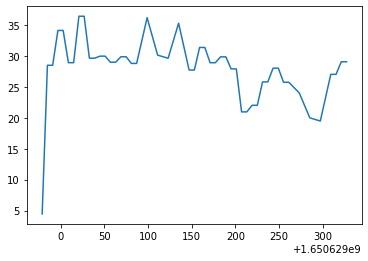

GPU joules per step is: 140.75929994339646


In [5]:

# Plot watt usage and calculate total energy of system
plt.plot(distil_istat['time'], distil_istat['watt'])
plt.show()
test1 = (integrate.trapz(distil_istat.watt, x=distil_istat.time) - GPU_idle_joules + distil_training_cpu_dram_joules_1)/60
GPU_Energy_test1 = (integrate.trapz(distil_istat.watt, x=distil_istat.time) - GPU_idle_joules)/60
print("GPU joules per step is:", test1)

In [6]:
# Distil training 2 70 steps
distil_istat = pd.read_csv('../data/distil_GPU_2.csv', low_memory=False)

distil_power_gadget = pd.read_csv('../data/PwrData_2022-4-23_12-58-52_distil_training_2.csv', low_memory=False)

test_start = int((pd.to_datetime(distil_power_gadget['System Time'][0][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))
test_stop = int((pd.to_datetime(distil_power_gadget['System Time'].iloc[-12][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))

# Manual convertion of start and end time
distil_data_program_start = test_start
distil_training_start = 1650711573
distil_training_stop = test_stop

# total training time in seconds
training_time = (datetime.fromtimestamp(distil_training_stop) - datetime.fromtimestamp(distil_data_program_start)).total_seconds()

distil_training_cpu = float(distil_power_gadget['System Time'].iloc[-6][34:])
distil_training_dram = float(distil_power_gadget['System Time'].iloc[-3][36:])

# Watts during training 70 steps 
idle_GPU = distil_istat[distil_training_start >= distil_istat['time']]['watt']
distil_istat = distil_istat[(distil_training_start <= distil_istat['time']) & (distil_training_stop >= distil_istat['time'])]
distil_istat.tail()

# GPU idle energy 
GPU_idle_joules =  training_time * idle_GPU.mean()
test_start 

1650711532

In [7]:

# Separate setup time and training time and add training time cpu and dram when calculating the energy for one step. 
# There is an overlap between training start and setup stop. Setup stop seemes to be 113 ~rows+ = 5s from training start location.  

timesHelper = lambda x:(pd.to_datetime(distil_power_gadget['System Time'].iloc[:-12][x], format="%H:%M:%S:%f") + timedelta(days=44672)).strftime('%s')
getRowOfUnixTime = lambda x: [timesHelper(i) for i in range(distil_power_gadget.shape[0]-12)].index(str(x))
getDateTime = lambda x, y=0: distil_power_gadget['System Time'].iloc[:-12][x + y]
getDataFromRow = lambda col, x: distil_power_gadget[col].iloc[:-12][x]

# PRE POST trainign energy  
setup_stop_row = getRowOfUnixTime(distil_training_start)
pre = getDataFromRow('Cumulative IA Energy_0(Joules)', setup_stop_row)
pre = pre + getDataFromRow('Cumulative DRAM Energy_0(Joules)', setup_stop_row) 
post = distil_training_cpu + distil_training_dram - pre 

# CPU and DRAM energy 
distil_setup_cpu_dram_joules_2 = pre - (int(timesHelper(setup_stop_row)) - int(timesHelper(0)))*(avr_idle_CPU+avr_idle_DRAM)
distil_training_cpu_dram_joules_2 = post - (int(timesHelper(distil_power_gadget.shape[0]-13)) - int(timesHelper(setup_stop_row)))*(avr_idle_CPU+avr_idle_DRAM)
print(distil_setup_cpu_dram_joules_2, distil_training_cpu_dram_joules_2)

150.62153160453815 993.3531976580232


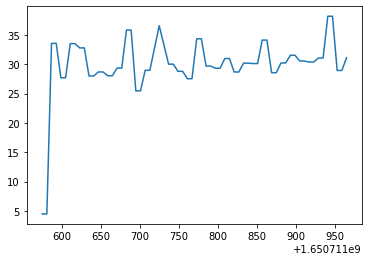

GPU joules per step is: 140.59003874149127


800

In [8]:
# Plot watt usage and calculate total energy of system
plt.plot(distil_istat['time'], distil_istat['watt'])
plt.show()
test2 = (integrate.trapz(distil_istat.watt, x=distil_istat.time) - GPU_idle_joules + distil_training_cpu_dram_joules_2)/70
GPU_Energy_test2 = (integrate.trapz(distil_istat.watt, x=distil_istat.time) - GPU_idle_joules)/70
print("GPU joules per step is:", test2)
setup_stop_row

In [9]:
# Distil training 3 60 steps
distil_istat = pd.read_csv('../data/distil_GPU_3.csv', low_memory=False)
distil_power_gadget = pd.read_csv('../data/PwrData_2022-4-23_13-42-20-distil_training_3.csv', low_memory=False)

test_start = int((pd.to_datetime(distil_power_gadget['System Time'][0][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))
test_stop = int((pd.to_datetime(distil_power_gadget['System Time'].iloc[-12][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))

# Manual convertion of start and end time
distil_data_program_start = test_start
distil_training_start = 1650714167
distil_training_stop = test_stop

# total training time in seconds
training_time = (datetime.fromtimestamp(distil_training_stop) - datetime.fromtimestamp(distil_data_program_start)).total_seconds()

distil_training_cpu = float(distil_power_gadget['System Time'].iloc[-6][34:])
distil_training_dram = float(distil_power_gadget['System Time'].iloc[-3][36:])

# Watts during training 60 steps 
idle_GPU = distil_istat[distil_training_start >= distil_istat['time']]['watt']
distil_istat = distil_istat[(distil_training_start <= distil_istat['time']) & (distil_training_stop >= distil_istat['time'])]
distil_istat.tail()

# GPU idle energy 
GPU_idle_joules =  training_time * idle_GPU.mean()


In [10]:

# Separate setup time and training time and add training time cpu and dram when calculating the energy for one step. 
# There is an overlap between training start and setup stop. Setup stop seemes to be 113 ~rows+ = 5s from training start location.  

timesHelper = lambda x:(pd.to_datetime(distil_power_gadget['System Time'].iloc[:-12][x], format="%H:%M:%S:%f") + timedelta(days=44672)).strftime('%s')
getRowOfUnixTime = lambda x: [timesHelper(i) for i in range(distil_power_gadget.shape[0]-12)].index(str(x))
getDateTime = lambda x, y=0: distil_power_gadget['System Time'].iloc[:-12][x + y]
getDataFromRow = lambda col, x: distil_power_gadget[col].iloc[:-12][x]

# PRE POST trainign energy  
setup_stop_row = getRowOfUnixTime(distil_training_start)
pre = getDataFromRow('Cumulative IA Energy_0(Joules)', setup_stop_row)
pre = pre + getDataFromRow('Cumulative DRAM Energy_0(Joules)', setup_stop_row) 
post = distil_training_cpu + distil_training_dram - pre 

# CPU and DRAM energy 
distil_setup_cpu_dram_joules_3 = pre - (int(timesHelper(setup_stop_row)) - int(timesHelper(0)))*(avr_idle_CPU+avr_idle_DRAM)
distil_training_cpu_dram_joules_3 = post - (int(timesHelper(distil_power_gadget.shape[0]-13)) - int(timesHelper(setup_stop_row)))*(avr_idle_CPU+avr_idle_DRAM)
print(distil_setup_cpu_dram_joules_3, distil_training_cpu_dram_joules_3)

175.25135008103734 895.5808782917345


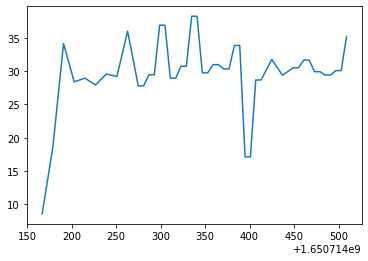

GPU joules per step is: 143.04028886754915


In [11]:
# Plot watt usage and calculate total energy of system
plt.plot(distil_istat['time'], distil_istat['watt'])
plt.show()
itgrt = integrate.trapz(distil_istat.watt, x=distil_istat.time)
test3 = (itgrt - GPU_idle_joules + distil_training_cpu_dram_joules_3)/60
GPU_Energy_test3 = (itgrt - GPU_idle_joules)/60
print("GPU joules per step is:", test3)

In [15]:
# Total consumption
steps = 13500
epochs = 3 
training_mean = (test1+test2+test3)/3
setup_mean = ((distil_setup_cpu_dram_joules_1+distil_setup_cpu_dram_joules_2+distil_setup_cpu_dram_joules_3)/3)
training_energy = steps*epochs*training_mean
cpu_dram_energy_step = ((distil_training_cpu_dram_joules_1/60+distil_training_cpu_dram_joules_2/70+distil_training_cpu_dram_joules_3/60)/3) 
cpu_dram_energy = steps*epochs*cpu_dram_energy_step + setup_mean
gpu_energy_step = ((GPU_Energy_test1 + GPU_Energy_test2 + GPU_Energy_test3)/3)
gpu_energy =steps*epochs*gpu_energy_step

# Sample standard deviation
summ = (test1 - training_mean)**2 + (test2 - training_mean)**2 + (test3 - training_mean)**2
standardDeviation = math.sqrt(summ/3)

# CPU and DRAM procentage of total energy consumption. 
print("Total energy used by training:", setup_mean+training_energy, ". Energy per step:", training_mean, ". Sample deviation:", standardDeviation)
print("CPU and DRAM energy consumption procentage of total energy consumption" , str(round(cpu_dram_energy / (training_energy + setup_mean), 5)*100) + "%")
print("CPU and DRAM step and total consumption:", cpu_dram_energy_step, cpu_dram_energy, ". GPU energy step and  consumption:", gpu_energy_step, gpu_energy)



Total energy used by training: 5729449.004424673 . Energy per step: 141.46320918414563 . Sample deviation: 1.1173025804650292
CPU and DRAM energy consumption procentage of total energy consumption 8.780000000000001%
CPU and DRAM step and total consumption: 12.416072284453714 503039.9599871501 . GPU energy step and  consumption: 129.04713689969194 5226409.044437523


### BERT
training 3 is made with base tokenizer. We cant conclude that fast tokenizer is better when training, but it should be. We will only use Fast tokenizer going forward. OBS, distil is only trained with fast.

We also asume that tokenizer is downloaded.

In [16]:
bert_istat = pd.read_csv('../data/bert_GPU_1.csv', low_memory=False)
bert_power_gadget = pd.read_csv('../data/PwrData_2022-4-23_20-57-16_bert_training_1.csv', low_memory=False)

test_start = int((pd.to_datetime(bert_power_gadget['System Time'][0][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))
test_stop = int((pd.to_datetime(bert_power_gadget['System Time'].iloc[-12][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))

# Manual convertion of start and end time
bert_data_program_start = test_start
bert_training_start = 1650740279
bert_training_stop = test_stop

# total training time in seconds
training_time = (datetime.fromtimestamp(bert_training_stop) - datetime.fromtimestamp(bert_data_program_start)).total_seconds()

bert_training_cpu = float(bert_power_gadget['System Time'].iloc[-6][34:])
bert_training_dram = float(bert_power_gadget['System Time'].iloc[-3][36:])

# CPU and DRAM energy 
bert_training_cpu_dram_joules_1 = bert_training_cpu + bert_training_dram - training_time * (avr_idle_CPU + avr_idle_DRAM)

# Watts during training 60 steps 
idle_GPU = bert_istat[bert_training_start >= bert_istat['time']]['watt']
bert_istat = bert_istat[(bert_training_start <= bert_istat['time']) & (bert_training_stop >= bert_istat['time'])]
bert_istat.tail()

# GPU idle energy 
GPU_idle_joules =  training_time * idle_GPU.mean()
idle_GPU.mean()
# idle_GPU.std(ddof=0)


4.7803315962514565

In [17]:

# Separate setup time and training time and add training time cpu and dram when calculating the energy for one step. 
# There is an overlap between training start and setup stop. Setup stop seemes to be 113 ~rows+ = 5s from training start location.  

timesHelper = lambda x:(pd.to_datetime(bert_power_gadget['System Time'].iloc[:-12][x], format="%H:%M:%S:%f") + timedelta(days=44672)).strftime('%s')
getRowOfUnixTime = lambda x: [timesHelper(i) for i in range(bert_power_gadget.shape[0]-12)].index(str(x))
getDateTime = lambda x, y=0: bert_power_gadget['System Time'].iloc[:-12][x + y]
getDataFromRow = lambda col, x: bert_power_gadget[col].iloc[:-12][x]

# PRE POST trainign energy  
setup_stop_row = getRowOfUnixTime(bert_training_start) + 20
pre = getDataFromRow('Cumulative IA Energy_0(Joules)', setup_stop_row)
pre = pre + getDataFromRow('Cumulative DRAM Energy_0(Joules)', setup_stop_row) 
post = bert_training_cpu + bert_training_dram - pre 

# CPU and DRAM energy 
bert_setup_cpu_dram_joules_1 = pre - (int(timesHelper(setup_stop_row)) - int(timesHelper(0)))*(avr_idle_CPU+avr_idle_DRAM)
bert_training_cpu_dram_joules_1 = post - (int(timesHelper(bert_power_gadget.shape[0]-13)) - int(timesHelper(setup_stop_row)))*(avr_idle_CPU+avr_idle_DRAM)
print(bert_setup_cpu_dram_joules_1, bert_training_cpu_dram_joules_1)

416.39557050243116 1563.4170843371164


In [18]:
setup_stop_row

850

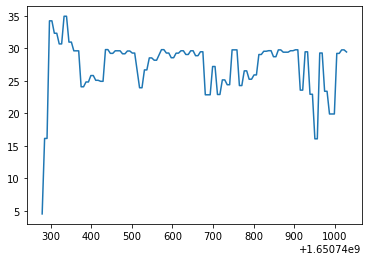

GPU joules per step is: 304.8867700496808


In [19]:
plt.plot(bert_istat['time'], bert_istat['watt'])
plt.show()
itgrt = integrate.trapz(bert_istat.watt, x=bert_istat.time)
test1 = (itgrt - GPU_idle_joules + bert_training_cpu_dram_joules_1)/60
GPU_Energy_test1 = (itgrt - GPU_idle_joules)/60
print("GPU joules per step is:", test1)

In [20]:
# Distil training 2 70 steps
bert_istat = pd.read_csv('../data/bert_GPU_2.csv', low_memory=False)

bert_power_gadget = pd.read_csv('../data/PwrData_2022-4-23_21-23-45_bert_training_2.csv', low_memory=False)

test_start = int((pd.to_datetime(bert_power_gadget['System Time'][0][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))
test_stop = int((pd.to_datetime(bert_power_gadget['System Time'].iloc[-12][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))

# Manual convertion of start and end time
bert_data_program_start = test_start
bert_training_start = 1650741851
bert_training_stop = test_stop

# total training time in seconds
training_time = (datetime.fromtimestamp(bert_training_stop) - datetime.fromtimestamp(bert_data_program_start)).total_seconds()

bert_training_cpu = float(bert_power_gadget['System Time'].iloc[-6][34:])
bert_training_dram = float(bert_power_gadget['System Time'].iloc[-3][36:])

# CPU and DRAM energy 
bert_training_cpu_dram_joules_2 = bert_training_cpu + bert_training_dram - training_time * (avr_idle_CPU + avr_idle_DRAM)

# Watts during training 60 steps 
idle_GPU = bert_istat[bert_training_start >= bert_istat['time']]['watt']
bert_istat = bert_istat[(bert_training_start <= bert_istat['time']) & (bert_training_stop >= bert_istat['time'])]
bert_istat.tail()

# GPU idle energy 
GPU_idle_joules =  training_time * idle_GPU.mean()

In [21]:

# Separate setup time and training time and add training time cpu and dram when calculating the energy for one step. 
# There is an overlap between training start and setup stop. Setup stop seemes to be 113 ~rows+ = 5s from training start location.  

timesHelper = lambda x:(pd.to_datetime(bert_power_gadget['System Time'].iloc[:-12][x], format="%H:%M:%S:%f") + timedelta(days=44672)).strftime('%s')
getRowOfUnixTime = lambda x: [timesHelper(i) for i in range(bert_power_gadget.shape[0]-12)].index(str(x))
getDateTime = lambda x, y=0: bert_power_gadget['System Time'].iloc[:-12][x + y]
getDataFromRow = lambda col, x: bert_power_gadget[col].iloc[:-12][x]

# PRE POST trainign energy  
setup_stop_row = getRowOfUnixTime(bert_training_start) + 20
pre = getDataFromRow('Cumulative IA Energy_0(Joules)', setup_stop_row)
pre = pre + getDataFromRow('Cumulative DRAM Energy_0(Joules)', setup_stop_row) 
post = bert_training_cpu + bert_training_dram - pre 

# CPU and DRAM energy 
bert_setup_cpu_dram_joules_2 = pre - (int(timesHelper(setup_stop_row)) - int(timesHelper(0)))*(avr_idle_CPU+avr_idle_DRAM)
bert_training_cpu_dram_joules_2 = post - (int(timesHelper(bert_power_gadget.shape[0]-13)) - int(timesHelper(setup_stop_row)))*(avr_idle_CPU+avr_idle_DRAM)
print(bert_setup_cpu_dram_joules_2, bert_training_cpu_dram_joules_2)

287.5673500810373 1601.2556724862247


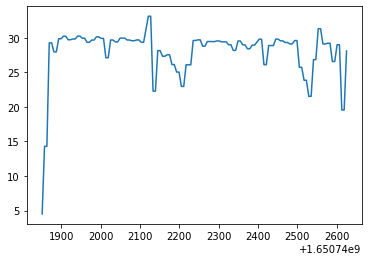

GPU joules per step is: 306.0656361663841


In [22]:
# Plot watt usage and calculate total energy of system
plt.plot(bert_istat['time'], bert_istat['watt'])
plt.show()
itgrt = integrate.trapz(bert_istat.watt, x=bert_istat.time)
test2 = (itgrt - GPU_idle_joules + bert_training_cpu_dram_joules_2)/64
GPU_Energy_test2 = (itgrt - GPU_idle_joules)/64
print("GPU joules per step is:", test2)

In [23]:
# bert training 3 60 steps
bert_istat = pd.read_csv('../data/bert_GPU_base.csv', low_memory=False)
bert_power_gadget = pd.read_csv('../data/PwrData_2022-4-23_21-57-15_bert_training_basetok.csv', low_memory=False)

test_start = int((pd.to_datetime(bert_power_gadget['System Time'][0][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))
test_stop = int((pd.to_datetime(bert_power_gadget['System Time'].iloc[-12][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))

# Manual convertion of start and end time
bert_data_program_start = test_start
bert_training_start = 1650743861
bert_training_stop = test_stop

# total training time in seconds
training_time = (datetime.fromtimestamp(bert_training_stop) - datetime.fromtimestamp(bert_data_program_start)).total_seconds()

bert_training_cpu = float(bert_power_gadget['System Time'].iloc[-6][34:])
bert_training_dram = float(bert_power_gadget['System Time'].iloc[-3][36:])

# CPU and DRAM energy 
bert_training_cpu_dram_joules_3 = bert_training_cpu + bert_training_dram - training_time * (avr_idle_CPU + avr_idle_DRAM)

# Watts during training 60 steps 
idle_GPU = bert_istat[bert_training_start >= bert_istat['time']]['watt']
bert_istat = bert_istat[(bert_training_start <= bert_istat['time']) & (bert_training_stop >= bert_istat['time'])]
bert_istat.tail()

# GPU idle energy 
GPU_idle_joules =  training_time * idle_GPU.mean()

In [24]:

# Separate setup time and training time and add training time cpu and dram when calculating the energy for one step. 
# There is an overlap between training start and setup stop. Setup stop seemes to be 113 ~rows+ = 5s from training start location.  

timesHelper = lambda x:(pd.to_datetime(bert_power_gadget['System Time'].iloc[:-12][x], format="%H:%M:%S:%f") + timedelta(days=44672)).strftime('%s')
getRowOfUnixTime = lambda x: [timesHelper(i) for i in range(bert_power_gadget.shape[0]-12)].index(str(x))
getDateTime = lambda x, y=0: bert_power_gadget['System Time'].iloc[:-12][x + y]
getDataFromRow = lambda col, x: bert_power_gadget[col].iloc[:-12][x]

# PRE POST trainign energy  
setup_stop_row = getRowOfUnixTime(bert_training_start) + 20
pre = getDataFromRow('Cumulative IA Energy_0(Joules)', setup_stop_row)
pre = pre + getDataFromRow('Cumulative DRAM Energy_0(Joules)', setup_stop_row) 
post = bert_training_cpu + bert_training_dram - pre 

# CPU and DRAM energy 
bert_setup_cpu_dram_joules_3 = pre - (int(timesHelper(setup_stop_row)) - int(timesHelper(0)))*(avr_idle_CPU+avr_idle_DRAM)
bert_training_cpu_dram_joules_3 = post - (int(timesHelper(bert_power_gadget.shape[0]-13)) - int(timesHelper(setup_stop_row)))*(avr_idle_CPU+avr_idle_DRAM)
print(bert_setup_cpu_dram_joules_3, bert_training_cpu_dram_joules_3)

311.96935008103725 1526.3470244051873


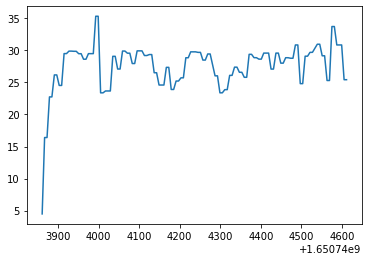

GPU joules per step is: 309.52054241439015


In [25]:
# Plot watt usage and calculate total energy of system
plt.plot(bert_istat['time'], bert_istat['watt'])
plt.show()
itgrt = integrate.trapz(bert_istat.watt, x=bert_istat.time)
test3 = (itgrt - GPU_idle_joules + bert_training_cpu_dram_joules_3)/60
GPU_Energy_test3 = (itgrt - GPU_idle_joules)/60
print("GPU joules per step is:", test3)

In [26]:
# Total consumption
steps = 13500
epochs = 3 
training_mean = (test1+test2+test3)/3
setup_mean = ((bert_setup_cpu_dram_joules_1+bert_setup_cpu_dram_joules_2+bert_setup_cpu_dram_joules_3)/3)
training_energy = steps*epochs*training_mean
cpu_dram_energy_step = ((bert_training_cpu_dram_joules_1/60+bert_training_cpu_dram_joules_2/64+bert_training_cpu_dram_joules_3/60)/3)
cpu_dram_energy = steps*epochs*cpu_dram_energy_step + setup_mean
gpu_energy_step = ((GPU_Energy_test1 + GPU_Energy_test2 + GPU_Energy_test3)/3)
gpu_energy =steps*epochs*gpu_energy_step

# Sample standard deviation
summ = (test1 - training_mean)**2 + (test2 - training_mean)**2 + (test3 - training_mean)**2
standardDeviation = math.sqrt(summ/3)

# CPU and DRAM procentage of total energy consumption. 
print("Total energy used by training:", setup_mean+training_energy, ". Energy per step:", training_mean, ". Sample deviation:", standardDeviation)
print("CPU and DRAM energy consumption procentage of total energy consumption" , str(round(cpu_dram_energy / (training_energy + setup_mean), 5)*100) + "%")
print("CPU and DRAM step and total consumption:", cpu_dram_energy_step, cpu_dram_energy, ". GPU energy step and  consumption:", gpu_energy_step, gpu_energy)



Total energy used by training: 12426723.450601365 . Energy per step: 306.82431621015166 . Sample deviation: 1.966326208710783
CPU and DRAM energy consumption procentage of total energy consumption 8.315%
CPU and DRAM step and total consumption: 25.505229453878552 1033300.4369723029 . GPU energy step and  consumption: 281.31908675627307 11393423.013629058


### Albert

In [27]:
albert_istat = pd.read_csv('../data/albert_GPU_1.csv', low_memory=False)
albert_power_gadget = pd.read_csv('../data/PwrData_2022-4-23_22-19-41_albert_training_1.csv', low_memory=False)

test_start = int((pd.to_datetime(albert_power_gadget['System Time'][0][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))
test_stop = int((pd.to_datetime(albert_power_gadget['System Time'].iloc[-12][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))

# Manual convertion of start and end time
albert_data_program_start = test_start
albert_training_start = 1650745211
albert_training_stop = test_stop

# total training time in seconds
training_time = (datetime.fromtimestamp(albert_training_stop) - datetime.fromtimestamp(albert_data_program_start)).total_seconds()

albert_training_cpu = float(albert_power_gadget['System Time'].iloc[-6][34:])
albert_training_dram = float(albert_power_gadget['System Time'].iloc[-3][36:])

# CPU and DRAM energy 
albert_training_cpu_dram_joules_1 = albert_training_cpu + albert_training_dram - training_time * (avr_idle_CPU + avr_idle_DRAM)

# Watts during training 60 steps 
idle_GPU = albert_istat[albert_training_start >= albert_istat['time']]['watt']
albert_istat = albert_istat[(albert_training_start <= albert_istat['time']) & (albert_training_stop >= albert_istat['time'])]
albert_istat.tail()

# GPU idle energy 
GPU_idle_joules =  training_time * idle_GPU.mean()

In [28]:

# Separate setup time and training time and add training time cpu and dram when calculating the energy for one step. 
# There is an overlap between training start and setup stop. Setup stop seemes to be 113 ~rows+ = 5s from training start location.  

timesHelper = lambda x:(pd.to_datetime(albert_power_gadget['System Time'].iloc[:-12][x], format="%H:%M:%S:%f") + timedelta(days=44672)).strftime('%s')
getRowOfUnixTime = lambda x: [timesHelper(i) for i in range(albert_power_gadget.shape[0]-12)].index(str(x))
getDateTime = lambda x, y=0: albert_power_gadget['System Time'].iloc[:-12][x + y]
getDataFromRow = lambda col, x: albert_power_gadget[col].iloc[:-12][x]

# PRE POST trainign energy  
setup_stop_row = getRowOfUnixTime(albert_training_start) + 47
pre = getDataFromRow('Cumulative IA Energy_0(Joules)', setup_stop_row)
pre = pre + getDataFromRow('Cumulative DRAM Energy_0(Joules)', setup_stop_row) 
post = albert_training_cpu + albert_training_dram - pre 

# CPU and DRAM energy 
albert_setup_cpu_dram_joules_1 = pre - (int(timesHelper(setup_stop_row)) - int(timesHelper(0)))*(avr_idle_CPU+avr_idle_DRAM)
albert_training_cpu_dram_joules_1 = post - (int(timesHelper(albert_power_gadget.shape[0]-13)) - int(timesHelper(setup_stop_row)))*(avr_idle_CPU+avr_idle_DRAM)
print(albert_setup_cpu_dram_joules_1, albert_training_cpu_dram_joules_1)

429.4114149108591 1148.2211015024318


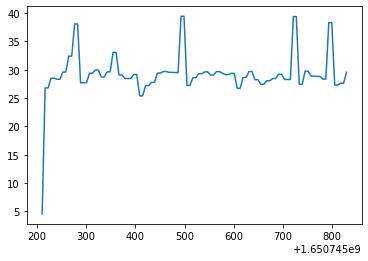

GPU joules per step is: 266.2122367512228


In [29]:
# Plot watt usage and calculate total energy of system
plt.plot(albert_istat['time'], albert_istat['watt'])
plt.show()
itgrt = integrate.trapz(albert_istat.watt, x=albert_istat.time)
test1 = (itgrt - GPU_idle_joules + albert_training_cpu_dram_joules_1)/60
GPU_Energy_test1 = (itgrt - GPU_idle_joules)/60
print("GPU joules per step is:", test1)

In [30]:
albert_istat = pd.read_csv('../data/albert_GPU_2.csv', low_memory=False)
albert_power_gadget = pd.read_csv('../data/PwrData_2022-4-23_22-34-14_albert_training_2.csv', low_memory=False)

test_start = int((pd.to_datetime(albert_power_gadget['System Time'][0][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))
test_stop = int((pd.to_datetime(albert_power_gadget['System Time'].iloc[-12][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))

# Manual convertion of start and end time
albert_data_program_start = test_start
albert_training_start = 1650746081
albert_training_stop = test_stop

# total training time in seconds
training_time = (datetime.fromtimestamp(albert_training_stop) - datetime.fromtimestamp(albert_data_program_start)).total_seconds()

albert_training_cpu = float(albert_power_gadget['System Time'].iloc[-6][34:])
albert_training_dram = float(albert_power_gadget['System Time'].iloc[-3][36:])

# CPU and DRAM energy 
albert_training_cpu_dram_joules_2 = albert_training_cpu + albert_training_dram - training_time * (avr_idle_CPU + avr_idle_DRAM)

# Watts during training 60 steps 
idle_GPU = albert_istat[albert_training_start >= albert_istat['time']]['watt']
albert_istat = albert_istat[(albert_training_start <= albert_istat['time']) & (albert_training_stop >= albert_istat['time'])]
albert_istat.tail()

# GPU idle energy 
GPU_idle_joules =  training_time * idle_GPU.mean()

In [32]:

# Separate setup time and training time and add training time cpu and dram when calculating the energy for one step. 
# There is an overlap between training start and setup stop. Setup stop seemes to be 113 ~rows+ = 5s from training start location.  

timesHelper = lambda x:(pd.to_datetime(albert_power_gadget['System Time'].iloc[:-12][x], format="%H:%M:%S:%f") + timedelta(days=44672)).strftime('%s')
getRowOfUnixTime = lambda x: [timesHelper(i) for i in range(albert_power_gadget.shape[0]-12)].index(str(x))
getDateTime = lambda x, y=0: albert_power_gadget['System Time'].iloc[:-12][x + y]
getDataFromRow = lambda col, x: albert_power_gadget[col].iloc[:-12][x]

# PRE POST trainign energy  
setup_stop_row = getRowOfUnixTime(albert_training_start) + 138
pre = getDataFromRow('Cumulative IA Energy_0(Joules)', setup_stop_row)
pre = pre + getDataFromRow('Cumulative DRAM Energy_0(Joules)', setup_stop_row) 
post = albert_training_cpu + albert_training_dram - pre 

# CPU and DRAM energy 
albert_setup_cpu_dram_joules_2 = pre - (int(timesHelper(setup_stop_row)) - int(timesHelper(0)))*(avr_idle_CPU+avr_idle_DRAM)
albert_training_cpu_dram_joules_2 = post - (int(timesHelper(albert_power_gadget.shape[0]-13)) - int(timesHelper(setup_stop_row)))*(avr_idle_CPU+avr_idle_DRAM)
print(albert_setup_cpu_dram_joules_2, albert_training_cpu_dram_joules_2)

370.1754408427877 1177.0557626045388


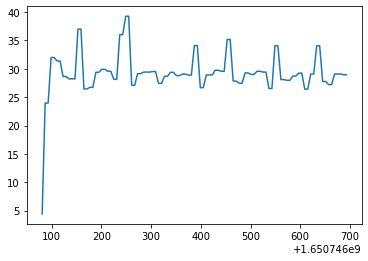

GPU joules per step is: 264.4026987609266


In [33]:
# Plot watt usage and calculate total energy of system
plt.plot(albert_istat['time'], albert_istat['watt'])
plt.show()
itgrt = integrate.trapz(albert_istat.watt, x=albert_istat.time)
test2 = (itgrt - GPU_idle_joules + albert_training_cpu_dram_joules_2)/60
GPU_Energy_test2 = (itgrt - GPU_idle_joules)/60
print("GPU joules per step is:", test2)

In [34]:
# Total consumption
steps = 13500
epochs = 3 
training_mean = (test1+test2)/2
setup_mean = ((albert_setup_cpu_dram_joules_1+albert_setup_cpu_dram_joules_2)/2)
training_energy = steps*epochs*training_mean
cpu_dram_energy_step = ((albert_training_cpu_dram_joules_1/60+albert_training_cpu_dram_joules_2/60)/2)
cpu_dram_energy = steps*epochs*cpu_dram_energy_step + setup_mean
gpu_energy_step = ((GPU_Energy_test1 + GPU_Energy_test2 + GPU_Energy_test3)/3)
gpu_energy =steps*epochs*gpu_energy_step

# Sample standard deviation
summ = (test1 - training_mean)**2 + (test2 - training_mean)**2
standardDeviation = math.sqrt(summ/2)

# CPU and DRAM procentage of total energy consumption. 
print("Total energy used by training:", setup_mean+training_energy, ". Energy per step:", training_mean, ". Sample deviation:", standardDeviation)
print("CPU and DRAM energy consumption procentage of total energy consumption" , str(round(cpu_dram_energy / (training_energy + setup_mean), 5)*100) + "%")
print("CPU and DRAM step and total consumption:", cpu_dram_energy_step, cpu_dram_energy, ". GPU energy step and  consumption:", gpu_energy_step, gpu_energy)



Total energy used by training: 10745352.237548904 . Energy per step: 265.30746775607474 . Sample deviation: 0.9047689951480891
CPU and DRAM energy consumption procentage of total energy consumption 7.3069999999999995%
CPU and DRAM step and total consumption: 19.377307200891423 785180.7350639794 . GPU energy step and  consumption: 258.6472488171123 10475213.577093048


### RoBERTa

In [18]:
roberta_istat = pd.read_csv('../data/roberta_GPU_1.csv', low_memory=False)
roberta_power_gadget = pd.read_csv('../data/PwrData_2022-4-23_22-54-56_roberta_training_1.csv', low_memory=False)

test_start = int((pd.to_datetime(roberta_power_gadget['System Time'][0][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))
test_stop = int((pd.to_datetime(roberta_power_gadget['System Time'].iloc[-12][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))

# Manual convertion of start and end time
roberta_data_program_start = test_start
roberta_training_start = 1650747335
roberta_training_stop = test_stop

# total training time in seconds
time = (datetime.fromtimestamp(roberta_training_stop) - datetime.fromtimestamp(roberta_data_program_start)).total_seconds()
training_time = (datetime.fromtimestamp(roberta_training_stop) - datetime.fromtimestamp(roberta_data_program_start)).total_seconds()

roberta_training_cpu = float(roberta_power_gadget['System Time'].iloc[-6][34:])
roberta_training_dram = float(roberta_power_gadget['System Time'].iloc[-3][36:])
print("CPU energy usage is:", roberta_training_cpu)
print("DRAM energy usage is:", roberta_training_dram)

# CPU and DRAM energy 
roberta_training_cpu_dram_joules_1 = roberta_training_cpu + roberta_training_dram - time * (avr_idle_CPU + avr_idle_DRAM)

# Watts during training 550 steps 
idle_GPU = roberta_istat[roberta_training_start >= roberta_istat['time']]['watt']
roberta_istat = roberta_istat[(roberta_training_start <= roberta_istat['time']) & (roberta_training_stop >= roberta_istat['time'])]
roberta_istat.tail()

# GPU idle energy 
GPU_idle_joules =  training_time * idle_GPU.mean()
idle_GPU.mean()

CPU energy usage is: 2327.864136
DRAM energy usage is: 662.181885


4.910483968522813

In [36]:

# Separate setup time and training time and add training time cpu and dram when calculating the energy for one step. 
# There is an overlap between training start and setup stop. Setup stop seemes to be 113 ~rows+ = 5s from training start location.  

timesHelper = lambda x:(pd.to_datetime(roberta_power_gadget['System Time'].iloc[:-12][x], format="%H:%M:%S:%f") + timedelta(days=44672)).strftime('%s')
getRowOfUnixTime = lambda x: [timesHelper(i) for i in range(roberta_power_gadget.shape[0]-12)].index(str(x))
getDateTime = lambda x, y=0: roberta_power_gadget['System Time'].iloc[:-12][x + y]
getDataFromRow = lambda col, x: roberta_power_gadget[col].iloc[:-12][x]

# PRE POST trainign energy  
setup_stop_row = getRowOfUnixTime(roberta_training_start)
pre = getDataFromRow('Cumulative IA Energy_0(Joules)', setup_stop_row)
pre = pre + getDataFromRow('Cumulative DRAM Energy_0(Joules)', setup_stop_row) 
post = roberta_training_cpu + roberta_training_dram - pre 

# CPU and DRAM energy 
roberta_setup_cpu_dram_joules_1 = pre - (int(timesHelper(setup_stop_row)) - int(timesHelper(0)))*(avr_idle_CPU+avr_idle_DRAM)
roberta_training_cpu_dram_joules_1 = post - (int(timesHelper(roberta_power_gadget.shape[0]-13)) - int(timesHelper(setup_stop_row)))*(avr_idle_CPU+avr_idle_DRAM)
print(roberta_setup_cpu_dram_joules_1, roberta_training_cpu_dram_joules_1)

485.5475056726095 1562.622641745544


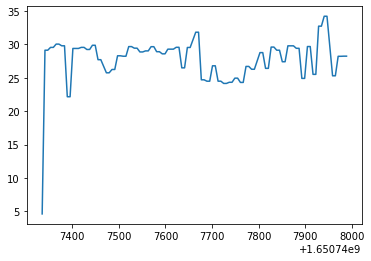

GPU joules per step is: 266.5061836415375


In [37]:
# Plot watt usage and calculate total energy of system
plt.plot(roberta_istat['time'], roberta_istat['watt'])
plt.show()
itgrt = integrate.trapz(roberta_istat.watt, x=roberta_istat.time)
test1 = (itgrt - GPU_idle_joules + roberta_training_cpu_dram_joules_1)/60
GPU_Energy_test1 = (itgrt - GPU_idle_joules)/60
print("GPU joules per step is:", test1)

In [38]:
roberta_istat = pd.read_csv('../data/roberta_GPU_2.csv', low_memory=False)
roberta_power_gadget = pd.read_csv('../data/PwrData_2022-4-23_23-13-58_roberta_training_2.csv', low_memory=False)

test_start = int((pd.to_datetime(roberta_power_gadget['System Time'][0][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))
test_stop = int((pd.to_datetime(roberta_power_gadget['System Time'].iloc[-12][:-4], format="%H:%M:%S") + timedelta(days=44672)).strftime('%s'))

# Manual convertion of start and end time
roberta_data_program_start = test_start
roberta_training_start = 1650748475
roberta_training_stop = test_stop

# total training time in seconds
time = (datetime.fromtimestamp(roberta_training_stop) - datetime.fromtimestamp(roberta_data_program_start)).total_seconds()
training_time = (datetime.fromtimestamp(roberta_training_stop) - datetime.fromtimestamp(roberta_data_program_start)).total_seconds()

roberta_training_cpu = float(roberta_power_gadget['System Time'].iloc[-6][34:])
roberta_training_dram = float(roberta_power_gadget['System Time'].iloc[-3][36:])

# CPU and DRAM energy 
roberta_training_cpu_dram_joules_2 = roberta_training_cpu + roberta_training_dram - time * (avr_idle_CPU + avr_idle_DRAM)

# Watts during training 550 steps 
idle_GPU = roberta_istat[roberta_training_start >= roberta_istat['time']]['watt']
roberta_istat = roberta_istat[(roberta_training_start <= roberta_istat['time']) & (roberta_training_stop >= roberta_istat['time'])]
roberta_istat.tail()

# GPU idle energy 
GPU_idle_joules =  training_time * idle_GPU.mean()
idle_GPU.mean()

4.942012344797452

In [39]:

# Separate setup time and training time and add training time cpu and dram when calculating the energy for one step. 
# There is an overlap between training start and setup stop. Setup stop seemes to be 113 ~rows+ = 5s from training start location.  

timesHelper = lambda x:(pd.to_datetime(roberta_power_gadget['System Time'].iloc[:-12][x], format="%H:%M:%S:%f") + timedelta(days=44672)).strftime('%s')
getRowOfUnixTime = lambda x: [timesHelper(i) for i in range(roberta_power_gadget.shape[0]-12)].index(str(x))
getDateTime = lambda x, y=0: roberta_power_gadget['System Time'].iloc[:-12][x + y]
getDataFromRow = lambda col, x: roberta_power_gadget[col].iloc[:-12][x]

# PRE POST trainign energy  
setup_stop_row = getRowOfUnixTime(roberta_training_start)
pre = getDataFromRow('Cumulative IA Energy_0(Joules)', setup_stop_row)
pre = pre + getDataFromRow('Cumulative DRAM Energy_0(Joules)', setup_stop_row) 
post = roberta_training_cpu + roberta_training_dram - pre 

# CPU and DRAM energy 
roberta_setup_cpu_dram_joules_2 = pre - (int(timesHelper(setup_stop_row)) - int(timesHelper(0)))*(avr_idle_CPU+avr_idle_DRAM)
roberta_training_cpu_dram_joules_2 = post - (int(timesHelper(roberta_power_gadget.shape[0]-13)) - int(timesHelper(setup_stop_row)))*(avr_idle_CPU+avr_idle_DRAM)
print(roberta_setup_cpu_dram_joules_2, roberta_training_cpu_dram_joules_2)

402.32947974068077 1525.6437945413304


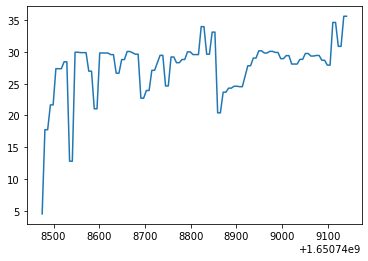

GPU joules per step is: 268.4393279216318


In [40]:
# Plot watt usage and calculate total energy of system
plt.plot(roberta_istat['time'], roberta_istat['watt'])
plt.show()
itgrt = integrate.trapz(roberta_istat.watt, x=roberta_istat.time)
test2 = (itgrt - GPU_idle_joules + roberta_training_cpu_dram_joules_2)/60
GPU_Energy_test2 = (itgrt - GPU_idle_joules)/60
print("GPU joules per step is:", test2)

In [41]:
roberta_istat = pd.read_csv('../data/Roberta_long_GPU_day.csv', low_memory=False)
roberta_power_gadget = pd.read_csv('../data/PwrData_2022-4-24_10-37-13_roberta_long_training_1.csv', low_memory=False)

test_start = int((pd.to_datetime(roberta_power_gadget['System Time'][0][:-4], format="%H:%M:%S") + timedelta(days=44673)).strftime('%s'))
test_stop = int((pd.to_datetime(roberta_power_gadget['System Time'].iloc[-12][:-4], format="%H:%M:%S") + timedelta(days=44673)).strftime('%s'))

# Manual convertion of start and end time
roberta_data_program_start = test_start
roberta_training_start = 1650789462
roberta_training_stop = test_stop

# total training time in seconds
time = (datetime.fromtimestamp(roberta_training_stop) - datetime.fromtimestamp(roberta_data_program_start)).total_seconds()
training_time = (datetime.fromtimestamp(roberta_training_stop) - datetime.fromtimestamp(roberta_data_program_start)).total_seconds()

roberta_training_cpu = float(roberta_power_gadget['System Time'].iloc[-6][34:])
roberta_training_dram = float(roberta_power_gadget['System Time'].iloc[-3][36:])

# CPU and DRAM energy 
roberta_training_cpu_dram_joules_3 = roberta_training_cpu + roberta_training_dram - time * (avr_idle_CPU + avr_idle_DRAM)

# Watts during training 550 steps 
idle_GPU = roberta_istat[roberta_training_start >= roberta_istat['time']]['watt']
roberta_istat = roberta_istat[(roberta_training_start <= roberta_istat['time']) & (roberta_training_stop >= roberta_istat['time'])]
roberta_istat.tail()

# GPU idle energy 
GPU_idle_joules =  training_time * idle_GPU.mean()
idle_GPU.mean()

5.832074886918023

In [42]:

# Separate setup time and training time and add training time cpu and dram when calculating the energy for one step. 
# There is an overlap between training start and setup stop. Setup stop seemes to be 113 ~rows+ = 5s from training start location.  

timesHelper = lambda x:(pd.to_datetime(roberta_power_gadget['System Time'].iloc[:-12][x], format="%H:%M:%S:%f") + timedelta(days=44673)).strftime('%s')
getRowOfUnixTime = lambda x: [timesHelper(i) for i in range(roberta_power_gadget.shape[0]-12)].index(str(x))
getDateTime = lambda x, y=0: roberta_power_gadget['System Time'].iloc[:-12][x + y]
getDataFromRow = lambda col, x: roberta_power_gadget[col].iloc[:-12][x]

# PRE POST trainign energy  
setup_stop_row = getRowOfUnixTime(roberta_training_start)
pre = getDataFromRow('Cumulative IA Energy_0(Joules)', setup_stop_row)
pre = pre + getDataFromRow('Cumulative DRAM Energy_0(Joules)', setup_stop_row) 
post = roberta_training_cpu + roberta_training_dram - pre 

# CPU and DRAM energy 
roberta_setup_cpu_dram_joules_3 = pre - (int(timesHelper(setup_stop_row)) - int(timesHelper(0)))*(avr_idle_CPU+avr_idle_DRAM)
roberta_training_cpu_dram_joules_3 = post - (int(timesHelper(roberta_power_gadget.shape[0]-13)) - int(timesHelper(setup_stop_row)))*(avr_idle_CPU+avr_idle_DRAM)
print(roberta_setup_cpu_dram_joules_3, roberta_training_cpu_dram_joules_3)

232.579376012966 10708.06070722205


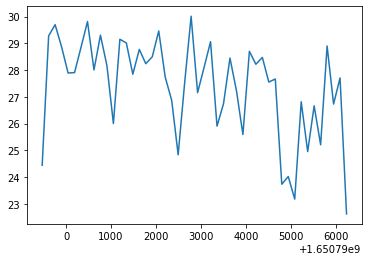

GPU joules per step is: 274.29718416652827


In [45]:
# Plot watt usage and calculate total energy of system
plt.plot(roberta_istat['time'], roberta_istat['watt'])
plt.show()
itgrt = integrate.trapz(roberta_istat.watt, x=roberta_istat.time)
test3 = (itgrt - GPU_idle_joules + roberta_training_cpu_dram_joules_3)/550-10
GPU_Energy_test3 = (itgrt - GPU_idle_joules)/550
print("GPU joules per step is:", test3)

In [46]:
# Total consumption
steps = 13500
epochs = 3 
training_mean = (test1+test2+test3)/3
setup_mean = ((roberta_setup_cpu_dram_joules_1+roberta_setup_cpu_dram_joules_2+roberta_setup_cpu_dram_joules_3)/3)
training_energy = steps*epochs*training_mean
cpu_dram_energy_step = ((roberta_training_cpu_dram_joules_1/60+roberta_training_cpu_dram_joules_2/60+roberta_training_cpu_dram_joules_3/550)/3)
cpu_dram_energy = steps*epochs*cpu_dram_energy_step + setup_mean
gpu_energy_step = ((GPU_Energy_test1 + GPU_Energy_test2 + GPU_Energy_test3)/3)
gpu_energy =steps*epochs*gpu_energy_step

# Sample standard deviation
summ = (test1 - training_mean)**2 + (test2 - training_mean)**2 + (test3 - training_mean)**2
standardDeviation = math.sqrt(summ/3)

# CPU and DRAM procentage of total energy consumption. 
print("Total energy used by Fine-tuning:", setup_mean+training_energy, ". Energy per step:", training_mean, ". Sample deviation:", standardDeviation)
print("CPU and DRAM energy consumption procentage of total energy consumption" , str(round(cpu_dram_energy / (training_energy + setup_mean), 5)*100) + "%")
print("CPU and DRAM step and total consumption:", cpu_dram_energy_step, cpu_dram_energy, ". GPU energy step and  consumption:", gpu_energy_step, gpu_energy)



Total energy used by Fine-tuning: 10925149.877804724 . Energy per step: 269.7475652432325 . Sample deviation: 3.312454876404441
CPU and DRAM energy consumption procentage of total energy consumption 8.769%
CPU and DRAM step and total consumption: 23.64676951910206 958067.6509774423 . GPU energy step and  consumption: 249.4341290574638 10102082.226827284


### BERT Large validation

##### Cold-start

In [8]:
bert_large_cold_cpu_1 = 406.653442
bert_large_cold_dram_1 = 29.502136
bert_large_cold_cpu_2 = 369.869507
bert_large_cold_dram_2 = 31.576172
bert_large_cold_cpu_3 = 367.745605
bert_large_cold_dram_3 = 33.113281

bert_large_cold_start_1 = pd.to_datetime("11:17:28:176", format=format)
bert_large_cold_start_2 = pd.to_datetime('11:18:32:082', format=format)
bert_large_cold_start_3 = pd.to_datetime('11:19:40:661', format=format)

bert_large_cold_stop_1 = pd.to_datetime('11:17:56:533', format=format)
bert_large_cold_stop_2 = pd.to_datetime('11:19:03:213', format=format)
bert_large_cold_stop_3 = pd.to_datetime('11:20:14:481', format=format)

In [9]:
bert_large_cold_joules_1 = bert_large_cold_cpu_1 + bert_large_cold_dram_1 - (bert_large_cold_stop_1 - bert_large_cold_start_1).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)
bert_large_cold_joules_2 = bert_large_cold_cpu_2 + bert_large_cold_dram_2 - (bert_large_cold_stop_2 - bert_large_cold_start_2).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)
bert_large_cold_joules_3 = bert_large_cold_cpu_3 + bert_large_cold_dram_3 - (bert_large_cold_stop_3 - bert_large_cold_start_3).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)

In [10]:
bert_large_cold_joules = (bert_large_cold_joules_1 + bert_large_cold_joules_2 + bert_large_cold_joules_3)/3

bert_large_cold_joules

371.3053252676056

#### Fine-tune

In [17]:
bert_large_istat = pd.read_csv('../data/bert_large_GPU_1.csv', low_memory=False)
bert_large_power_gadget = pd.read_csv('../data/PwrData_2022-5-12_13-45-15_bert-large-training_1.csv', low_memory=False)

test_start = int((pd.to_datetime(bert_large_power_gadget['System Time'][0][:-4], format="%H:%M:%S") + timedelta(days=44691)).strftime('%s'))
test_stop = int((pd.to_datetime(bert_large_power_gadget['System Time'].iloc[-12][:-4], format="%H:%M:%S") + timedelta(days=44691)).strftime('%s'))

# Manual convertion of start and end time
bert_large_data_program_start = test_start
bert_large_training_start = 1652355977
bert_large_training_stop = test_stop

# total training time in seconds
time = (datetime.fromtimestamp(bert_large_training_stop) - datetime.fromtimestamp(bert_large_data_program_start)).total_seconds()
training_time = (datetime.fromtimestamp(bert_large_training_stop) - datetime.fromtimestamp(bert_large_data_program_start)).total_seconds()

bert_large_training_cpu = float(bert_large_power_gadget['System Time'].iloc[-6][34:])
bert_large_training_dram = float(bert_large_power_gadget['System Time'].iloc[-3][36:])
print("CPU energy usage is:", bert_large_training_cpu)
print("DRAM energy usage is:", bert_large_training_dram)

# CPU and DRAM energy 
bert_large_training_cpu_dram_joules_1 = bert_large_training_cpu + bert_large_training_dram - time * (avr_idle_CPU + avr_idle_DRAM)

# Watts during training 550 steps 
idle_GPU = bert_large_istat[bert_large_training_start >= bert_large_istat['time']]['watt']
bert_large_istat = bert_large_istat[(bert_large_training_start <= bert_large_istat['time']) & (bert_large_training_stop >= bert_large_istat['time'])]
bert_large_istat.tail()

# GPU idle energy 
GPU_idle_joules =  training_time * idle_GPU.mean()
idle_GPU.mean()

CPU energy usage is: 23372.656677
DRAM energy usage is: 3772.039551


9.98252385854721

In [13]:

# Separate setup time and training time and add training time cpu and dram when calculating the energy for one step. 
# There is an overlap between training start and setup stop. Setup stop seemes to be 113 ~rows+ = 5s from training start location.  

timesHelper = lambda x:(pd.to_datetime(bert_large_power_gadget['System Time'].iloc[:-12][x], format="%H:%M:%S:%f") + timedelta(days=44691)).strftime('%s')
getRowOfUnixTime = lambda x: [timesHelper(i) for i in range(bert_large_power_gadget.shape[0]-12)].index(str(x))
getDateTime = lambda x, y=0: bert_large_power_gadget['System Time'].iloc[:-12][x + y]
getDataFromRow = lambda col, x: bert_large_power_gadget[col].iloc[:-12][x]

# PRE POST trainign energy  
setup_stop_row = getRowOfUnixTime(bert_large_training_start)
pre = getDataFromRow('Cumulative IA Energy_0(Joules)', setup_stop_row)
pre = pre + getDataFromRow('Cumulative DRAM Energy_0(Joules)', setup_stop_row) 
post = bert_large_training_cpu + bert_large_training_dram - pre 

# CPU and DRAM energy 
bert_large_setup_cpu_dram_joules_1 = pre - (int(timesHelper(setup_stop_row)) - int(timesHelper(0)))*(avr_idle_CPU+avr_idle_DRAM)
bert_large_training_cpu_dram_joules_1 = post - (int(timesHelper(bert_large_power_gadget.shape[0]-13)) - int(timesHelper(setup_stop_row)))*(avr_idle_CPU+avr_idle_DRAM)
print(bert_large_setup_cpu_dram_joules_1, bert_large_training_cpu_dram_joules_1)

828.6996267605634 22090.13350969014


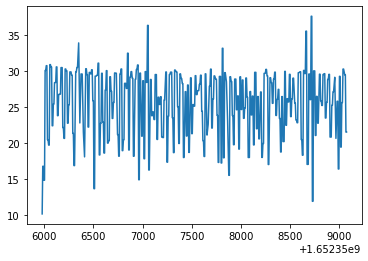

GPU joules per step is: 1161.2715340762434


In [14]:
# Plot watt usage and calculate total energy of system
plt.plot(bert_large_istat['time'], bert_large_istat['watt'])
plt.show()
itgrt = integrate.trapz(bert_large_istat.watt, x=bert_large_istat.time)
test1 = (itgrt - GPU_idle_joules + bert_large_training_cpu_dram_joules_1)/60
GPU_Energy_test1 = (itgrt - GPU_idle_joules)/60
print("GPU joules per step is:", test1)

In [50]:
bert_large_istat = pd.read_csv('../data/bert_large_GPU_70_2.csv', low_memory=False)
bert_large_power_gadget = pd.read_csv('../data/PwrData_2022-5-14_8-31-5_bert_large_trainint_2.csv', low_memory=False)

test_start = int((pd.to_datetime(bert_large_power_gadget['System Time'][0][:-4], format="%H:%M:%S") + timedelta(days=44693)).strftime('%s'))
test_stop = int((pd.to_datetime(bert_large_power_gadget['System Time'].iloc[-12][:-4], format="%H:%M:%S") + timedelta(days=44693)).strftime('%s'))

# Manual convertion of start and end time
bert_large_data_program_start = test_start
bert_large_training_start = 1652509899
bert_large_training_stop = test_stop

# total training time in seconds
time = (datetime.fromtimestamp(bert_large_training_stop) - datetime.fromtimestamp(bert_large_data_program_start)).total_seconds()
training_time = (datetime.fromtimestamp(bert_large_training_stop) - datetime.fromtimestamp(bert_large_data_program_start)).total_seconds()

bert_large_training_cpu = float(bert_large_power_gadget['System Time'].iloc[-6][34:])
bert_large_training_dram = float(bert_large_power_gadget['System Time'].iloc[-3][36:])

print("CPU energy usage is:", bert_large_training_cpu)
print("DRAM energy usage is:", bert_large_training_dram)

# CPU and DRAM energy 
bert_large_training_cpu_dram_joules_2 = bert_large_training_cpu + bert_large_training_dram - time * (avr_idle_CPU + avr_idle_DRAM)

# Watts during training 550 steps 
idle_GPU = bert_large_istat[bert_large_training_start >= bert_large_istat['time']]['watt']
bert_large_istat = bert_large_istat[(bert_large_training_start <= bert_large_istat['time']) & (bert_large_training_stop >= bert_large_istat['time'])]
bert_large_istat.tail()

# GPU idle energy 
GPU_idle_joules =  training_time * idle_GPU.mean()
idle_GPU.mean()

CPU energy usage is: 25378.972412
DRAM energy usage is: 4768.381409


1.0919608974031039

In [30]:

# Separate setup time and training time and add training time cpu and dram when calculating the energy for one step. 
# There is an overlap between training start and setup stop. Setup stop seemes to be 113 ~rows+ = 5s from training start location.  

timesHelper = lambda x:(pd.to_datetime(bert_large_power_gadget['System Time'].iloc[:-12][x], format="%H:%M:%S:%f") + timedelta(days=44693)).strftime('%s')
getRowOfUnixTime = lambda x: [timesHelper(i) for i in range(bert_large_power_gadget.shape[0]-12)].index(str(x))
getDateTime = lambda x, y=0: bert_large_power_gadget['System Time'].iloc[:-12][x + y]
getDataFromRow = lambda col, x: bert_large_power_gadget[col].iloc[:-12][x]

# PRE POST trainign energy  
setup_stop_row = getRowOfUnixTime(bert_large_training_start)
pre = getDataFromRow('Cumulative IA Energy_0(Joules)', setup_stop_row)
pre = pre + getDataFromRow('Cumulative DRAM Energy_0(Joules)', setup_stop_row) 
post = bert_large_training_cpu + bert_large_training_dram - pre 

# CPU and DRAM energy 
bert_large_setup_cpu_dram_joules_2 = pre - (int(timesHelper(setup_stop_row)) - int(timesHelper(0)))*(avr_idle_CPU+avr_idle_DRAM)
bert_large_training_cpu_dram_joules_2 = post - (int(timesHelper(bert_large_power_gadget.shape[0]-13)) - int(timesHelper(setup_stop_row)))*(avr_idle_CPU+avr_idle_DRAM)
print(bert_large_setup_cpu_dram_joules_2, bert_large_training_cpu_dram_joules_2)

383.36202112676057 24952.16727522535


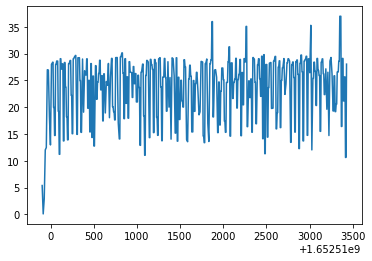

GPU joules per step is: 1482.3231351200702


In [31]:
# Plot watt usage and calculate total energy of system
plt.plot(bert_large_istat['time'], bert_large_istat['watt'])
plt.show()
itgrt = integrate.trapz(bert_large_istat.watt, x=bert_large_istat.time)
test2 = (itgrt - GPU_idle_joules + bert_large_training_cpu_dram_joules_2)/70
GPU_Energy_test2 = (itgrt - GPU_idle_joules)/70
print("GPU joules per step is:", test2)

In [45]:
bert_large_istat = pd.read_csv('../data/bert_large_GPU_62_2+3.csv', low_memory=False)
bert_large_power_gadget = pd.read_csv('../data/PwrData_2022-5-14_9-57-13_bert_large_training_62_3.csv', low_memory=False)

test_start = int((pd.to_datetime(bert_large_power_gadget['System Time'][0][:-4], format="%H:%M:%S") + timedelta(days=44693)).strftime('%s'))
test_stop = int((pd.to_datetime(bert_large_power_gadget['System Time'].iloc[-12][:-4], format="%H:%M:%S") + timedelta(days=44693)).strftime('%s'))

# Manual convertion of start and end time
bert_large_data_program_start = test_start
bert_large_training_start = 1652515019
bert_large_training_stop = test_stop

# total training time in seconds
time = (datetime.fromtimestamp(bert_large_training_stop) - datetime.fromtimestamp(bert_large_data_program_start)).total_seconds()
training_time = (datetime.fromtimestamp(bert_large_training_stop) - datetime.fromtimestamp(bert_large_data_program_start)).total_seconds()

bert_large_training_cpu = float(bert_large_power_gadget['System Time'].iloc[-6][34:])
bert_large_training_dram = float(bert_large_power_gadget['System Time'].iloc[-3][36:])

# CPU and DRAM energy 
bert_large_training_cpu_dram_joules_3 = bert_large_training_cpu + bert_large_training_dram - time * (avr_idle_CPU + avr_idle_DRAM)

# Watts during training 550 steps 
idle_GPU = bert_large_istat[bert_large_training_start >= bert_large_istat['time']]['watt']
bert_large_istat = bert_large_istat[(bert_large_training_start <= bert_large_istat['time']) & (bert_large_training_stop >= bert_large_istat['time'])]
bert_large_istat.tail()

# GPU idle energy 
GPU_idle_joules =  training_time * idle_GPU.mean()
idle_GPU.mean()

2.4379846902744227

In [46]:

# Separate setup time and training time and add training time cpu and dram when calculating the energy for one step. 
# There is an overlap between training start and setup stop. Setup stop seemes to be 113 ~rows+ = 5s from training start location.  

timesHelper = lambda x:(pd.to_datetime(bert_large_power_gadget['System Time'].iloc[:-12][x], format="%H:%M:%S:%f") + timedelta(days=44673)).strftime('%s')
getRowOfUnixTime = lambda x: [timesHelper(i) for i in range(bert_large_power_gadget.shape[0]-12)].index(str(x))
getDateTime = lambda x, y=0: bert_large_power_gadget['System Time'].iloc[:-12][x + y]
getDataFromRow = lambda col, x: bert_large_power_gadget[col].iloc[:-12][x]

# PRE POST trainign energy  
setup_stop_row = getRowOfUnixTime(bert_large_training_start)
pre = getDataFromRow('Cumulative IA Energy_0(Joules)', setup_stop_row)
pre = pre + getDataFromRow('Cumulative DRAM Energy_0(Joules)', setup_stop_row) 
post = bert_large_training_cpu + bert_large_training_dram - pre 

# CPU and DRAM energy 
bert_large_setup_cpu_dram_joules_3 = pre - (int(timesHelper(setup_stop_row)) - int(timesHelper(0)))*(avr_idle_CPU+avr_idle_DRAM)
bert_large_training_cpu_dram_joules_3 = post - (int(timesHelper(bert_large_power_gadget.shape[0]-13)) - int(timesHelper(setup_stop_row)))*(avr_idle_CPU+avr_idle_DRAM)
print(bert_large_setup_cpu_dram_joules_3, bert_large_training_cpu_dram_joules_3)

ValueError: '1652515020' is not in list

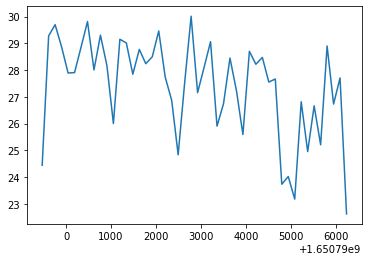

GPU joules per step is: 274.29718416652827


In [ ]:
# Plot watt usage and calculate total energy of system
plt.plot(bert_large_istat['time'], bert_large_istat['watt'])
plt.show()
itgrt = integrate.trapz(bert_large_istat.watt, x=bert_large_istat.time)
test3 = (itgrt - GPU_idle_joules + bert_large_training_cpu_dram_joules_3)/62
GPU_Energy_test3 = (itgrt - GPU_idle_joules)/62
print("GPU joules per step is:", test3)

In [49]:
# Total consumption
steps = 13500
epochs = 3 
training_mean = (test1+test2)/2
setup_mean = ((bert_large_setup_cpu_dram_joules_1+bert_large_setup_cpu_dram_joules_2)/2)
training_energy = steps*epochs*training_mean
cpu_dram_energy_step = ((bert_large_training_cpu_dram_joules_1/60+bert_large_training_cpu_dram_joules_2/70)/2)
cpu_dram_energy = steps*epochs*cpu_dram_energy_step + setup_mean
gpu_energy_step = ((GPU_Energy_test1 + GPU_Energy_test2)/2)
gpu_energy =steps*epochs*gpu_energy_step

# Sample standard deviation
summ = (test1 - training_mean)**2 + (test2 - training_mean)**2 
standardDeviation = math.sqrt(summ/3)

# CPU and DRAM procentage of total energy consumption. 
print("Total energy used by Fine-tuning:", setup_mean+training_energy, ". Energy per step:", training_mean, ". Sample deviation:", standardDeviation)
print("CPU and DRAM energy consumption procentage of total energy consumption" , str(round(cpu_dram_energy / (training_energy + setup_mean), 5)*100) + "%")
print("CPU and DRAM step and total consumption:", cpu_dram_energy_step, cpu_dram_energy, ". GPU energy step and  consumption:", gpu_energy_step, gpu_energy)



Total energy used by Fine-tuning: 53533398.082049295 . Energy per step: 1321.7973345981568 . Sample deviation: 131.06876727682848
CPU and DRAM energy consumption procentage of total energy consumption 27.933999999999997%
CPU and DRAM step and total consumption: 369.22004238869886 14954017.747566247 . GPU energy step and  consumption: 959.4831224324626 38859066.458514735


In [35]:
# Total consumption
steps = 13500
epochs = 3 
training_mean = test2
setup_mean = bert_large_setup_cpu_dram_joules_2
training_energy = steps*epochs*training_mean
cpu_dram_energy_step = bert_large_training_cpu_dram_joules_2/70
cpu_dram_energy = steps*epochs*cpu_dram_energy_step + setup_mean
gpu_energy_step = GPU_Energy_test2
gpu_energy =steps*epochs*gpu_energy_step

# Sample standard deviation
summ = (test2 - training_mean)**2 
standardDeviation = math.sqrt(summ/3)

# CPU and DRAM procentage of total energy consumption. 
print("Total energy used by Fine-tuning:", setup_mean+training_energy, ". Energy per step:", training_mean, ". Sample deviation:", standardDeviation)
print("CPU and DRAM energy consumption procentage of total energy consumption" , str(round(cpu_dram_energy / (training_energy + setup_mean), 5)*100) + "%")
print("CPU and DRAM step and total consumption:", cpu_dram_energy_step, cpu_dram_energy, ". GPU energy step and  consumption:", gpu_energy_step, gpu_energy)



Total energy used by Fine-tuning: 60034470.33438397 . Energy per step: 1482.3231351200702 . Sample deviation: 0.0
CPU and DRAM energy consumption procentage of total energy consumption 24.048%
CPU and DRAM step and total consumption: 356.4595325032193 14436994.428401507 . GPU energy step and  consumption: 1125.8636026168508 45597475.90598246


#### Inference Validation

In [6]:
bert_large_power_gadget = pd.read_csv('../data/PwrData_2022-5-17_20-41-24_inference.csv', low_memory=False)

bert_large_fast_time_test_stop = pd.to_datetime('21:22:02:792', format=format)
bert_large_fast_time_test_start = pd.to_datetime('20:41:24:331', format=format)

bert_large_fast_cpu_joules_data = float(bert_large_power_gadget['System Time'].iloc[-6][34:]) 
bert_large_fast_dram_joules_data = float(bert_large_power_gadget['System Time'].iloc[-3][36:])

In [10]:
# Total CPU and DRAM joules for bert large fast tokenizer
bert_large_fast_joules = bert_large_fast_cpu_joules_data + bert_large_fast_dram_joules_data - (bert_large_fast_time_test_stop - bert_large_fast_time_test_start).total_seconds() * (avr_idle_CPU + avr_idle_DRAM)
bert_large_fast_joules

45886.24392799838